In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
data_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/'
plot_folder = '/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/plots/'

In [3]:
# file_names =[ 'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse',
#              'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']
             #'kmer_BatchCorrected_bmi_corrected_pearson_and_mse']

    #'otu_BatchCorrected_bmi_corrected_pearson_and_mse'
#'kmer_kmer_table_bmi_corrected_pearson_and_mse',

#['bmi_corrected_pearson_and_mse','bmi_corrected_pearson_and_mse']
# folder_names = ['AGP_Hfilter_otu','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k']
# file_names =[ 'otu_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc']

# nice_names = ["OTU","KMER","KMER"]

#select_labels =["Raw","Phen Correct"]#["raw","BMC","ComBat","limma","SmartSVA (sv=7)","MINERVA (sv=6)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
#["raw","MINERVA+ (sv=8)", "MINERVA+ (sv=9)","MINERVA+ (sv=10)","MINERVA (sv=8)","MINERVA (sv=9)","MINERVA (sv=10)"]# ["raw","ComBat","limma","SmartSVA (sv=10)","MINERVA (sv=10)"]##[0.20,0.40,0.60,0.80]#["raw","ComBat","BMC","limma","SmartSVA (sv=1)","MINERVA (sv=1)"]# ["5-mer","6-mer","7-mer"]#


trans = "clr_scale"
key = "AGP_abx_time_lapse"
subfile = ""
select_columns_bool = False

if key == "Wirbel_PhenoCorrect":
    phen = ["DiseaseState","DiseaseState"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Wirbel_DataAugmentation":
    phen = ["DiseaseState","DiseaseState"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"

if key == "Thomas_kmer_PredDomainPheno":
    
    phen = ["bin_crc_adenomaORnormal","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Thomas_kmer_PhenoCorrect_multi":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Naive Bayes"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"

if key == "Thomas_kmer_DataAugment":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["Thomas_k6","Thomas_k6_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word = "accuracy"
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "AGP_abx_time_lapse":
    kmer_spec = 7
    numPc = [0,0] 
    phen = ["Abx0_6","Abx6_12"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history at 0-6 mo, 6-12 mo"
    phen_type = "class" 
    
    folder_names = ["AGP_max_k" + str(kmer_spec) + "_Abx0_6","AGP_max_k" + str(kmer_spec) + "_Abx6_12",]
    file_names =['rawfilter_TRUE' for i in range(0,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = ['Abx 0-6 months','Abx 6-12 months']
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.6,0.73)
    not_rotate=True
    subfile = ""

if key == "AGP_abx6_12_calibrate":
    kmer_spec = 5
    abx_spec = "6_12"
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["Abx" + abx_spec for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history" + abx_spec 
    phen_type = "class" 
    
    folder_names = ["AGP_max_k" + str(kmer_spec) + "_Abx" + abx_spec for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.55,0.70)
    not_rotate=True
    subfile = ""
if key == "AGP_abx_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_antibiotic_last_year" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history" 
    phen_type = "class" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.55,0.70)
    not_rotate=True
    subfile = "class_pred/"
    

if key == "AGP_abx":
    numPc = [0,0,0,0,3]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bin_antibiotic_last_year" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "antibiotic history" 
    phen_type = "class" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first3filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=3)"] #"Refactor (sv=9)","SmartSVA (sv=3)",
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    trans = "clr_scale"
    limit_spec =(0.55,0.75)
    shortened=True
    not_rotate=True
    subfile = "class_pred/"
if key == "AGP_BMI_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bmi_corrected" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "body mass index (BMI)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc#["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    metric_word = "pearson"
    chosen_classifier = "Naive Bayes"
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    limit_spec =(0.13,0.33)
    shortened=True
    not_rotate=True
    
    subfile = "cont_pred/"
    
if key == "AGP_BMI":
    numPc = [0,0,0,0,2]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bmi_corrected" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "body mass index (BMI)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont" 
    
    folder_names = ["AGP_max_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first2filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=2)"] #"Refactor (sv=9)","SmartSVA (sv=3)",
    metric_word = "pearson"
    chosen_classifier = "Naive Bayes"
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    trans = "clr_scale"
    limit_spec =(0.13,0.37)
    shortened=True
    not_rotate=False
    
    subfile = "cont_pred/"

if key == "Thomas_kmer":
    numPc = [0,0,0,0,4] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k6" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=4)"]
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.5,1)
    shortened=True
    not_rotate=False

if key == "Thomas_kmer_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#"bin_crc_adenomaORnormal" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["Thomas_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc 
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    limit_spec =(0.5,0.85)
    shortened=True
    not_rotate=True

    
if key == "Thomas_Augmentation":
    numPc = [0,0]
    phen = "bin_crc_normal"# #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_crc_adenomaORnormal"#""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"#"class
    folder_names = ['CRC_thomas_otu', 'CRC_thomas_otu_DataAugmentation']
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    
    
if key == "Thomas_otu_calibrate":    
    
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    folder_names = ["CRC_thomas_otu" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.5,1)
    shortened=True
    not_rotate=False
    
    
if key == "Thomas_otu":   
    numPc = [0,0,0,0,0] 
    phen = ["bin_crc_adenomaORnormal" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    folder_names = ["Thomas_otu" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","MINERVA (sv=4)"]
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    limit_spec =(0.5,1)
    shortened=True
    not_rotate=False
    
    
    
    
    
    
    
if key == "Thomas_mse":
    numPc = [0,0]
    phen = "bin_crc_normal"# #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_crc_adenomaORnormal"#""bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont"#"class"
    folder_names = ['CRC_thomas_otu', 'CRC_thomas_otu_PhenCorrect']
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']

if key == "Gibbons_k_otu":
    numPc = [0,0,150,4]#,11,12,13,14,15,16,17,18,19,20] 
    phen = ["bin_crc","bin_crc_normal","bin_crc","bin_crc_normal" ]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status (normal vs cancer)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    
    phen_type = "class"
    
    folder_names = ["CRC_otu","CRC_k7","CRC_otu","CRC_k7"]
    file_names = ['rawfilter_TRUE','rawfilter_TRUE','minerva_first150filter_TRUE','minerva_first4filter_TRUE'] 
    select_columns_bool = True
    select_labels = ["Raw OTU","Raw 7-mer","MINERVA OTU (sv=150)","MINERVA 7-mer (sv=4)"] #"Refactor (sv=9)","SmartSVA (sv=3)",
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    trans = "clr_scale"
    limit_spec =(0.4,1.1)
    shortened=True
    shortened_shortened=True
    not_rotate=False
    
if key == "Gibbons_calibrate_otu":
    numPc = [0,1,2,3,10,20,40,60,80,100,140,150,200,220,240,260,300]
    phen = ["bin_crc"  for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status (normal vs cancer)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    
    phen_type = "class"
    
    
    folder_names = ["CRC_otu" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.4,1)
    not_rotate=True
    subfile = "class_pred/"
if key == "Gibbons_calibrate":
    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_crc_normal"  for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status (adenoma/normal vs cancer)" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    
    phen_type = "class"
    
    
    folder_names = ["CRC_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    #select_labels = ["Raw"] + ["MINERVA" + str(i) for i in range(1,len(numPc))] 
    select_labels = numPc
    metric_word = "auc_all"
    chosen_classifier = "Naive Bayes"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"  
    limit_spec =(0.4,1)
    not_rotate=True
    
    
if key == "Gibbons":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0,0,0,10,10] 
    folder_names = ["CRC_k7" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
             'smartsva_first10filter_TRUE','minerva_first10filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma","SmartSVA (sv=10)","MINERVA (sv=10)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
if key == "Gibbons_DataAugment":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_DataAugmentation"]
    file_names = ['rawfilter_TRUE','DataAugmentationfilter_TRUE']
    select_columns_bool = True
    metric_word = "accuracy"
    select_labels = ["Raw","DataAugmentation"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    
if key == "Gibbons_PhenoCorrect_multi":
    phen = ["bin_crc_adenomaORnormal","bin_crc_adenomaORnormal"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#

    metric_word = "accuracy"
    select_labels = ["Raw","PhenoCorrection"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    chosen_classifier = "Random Forest"
    title = 'Accuracy for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    trans = "clr_scale"
    

if key == "Gibbons_PredDomainPheno":
    phen = ["bin_crc_adenomaORnormal","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #

    
if key == "Wirbel_PredDomainPheno":
    phen = ["DiseaseState","domain_pheno"]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    metric_word = 'accuracy'
    
    numPc = [0,0] 
    folder_names = ["CRC_wirbel_otu","CRC_wirbel_otu_PredDomainPheno"]
    file_names = ['rawfilter_TRUE','PredDomainPhenofilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PredDomainPheno"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    
if key == "Gibbons_PhenoCorrect_reg":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "cont"
    metric_word = 'pearson'
    
    numPc = [0,0] 
    folder_names = ["CRC_k7","CRC_k7_PhenoCorrect"]
    file_names = ['rawfilter_TRUE','PhenoCorrectfilter_TRUE']
    select_columns_bool = True
    select_labels = ["Raw","PhenoCorrect"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    title = 'Pearson for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    
    
if key == "Thomas_PhenoCorrect":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_thomas_otu","CRC_thomas_otu_PhenoCorrect"]
    file_names =['rawfilter_TRUE']+['PhenoCorrectfilter_TRUE']
    select_labels = numPc
    metric_word =  'auc_all'
if key == "Thomas_DomainCorrect":
    phen = "bin_crc_adenomaORnormal"#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "colorectal cancer status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    numPc = [0,0] 
    folder_names = ["CRC_thomas_otu" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['DomainCorrectfilter_TRUE']
    select_labels = file_names
    metric_word =  'auc_all'
if key == "T2D":
    numPc = [0,0,0,0,1] 
    phen = ["bin_t2d" for i in range(len(numPc))] #" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "diabetes status" 
    phen_type = "class"
    
    
    folder_names = ["T2D_k7" for i in range(len(numPc))]
    file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE'
                  ,'minerva_first1filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
    select_columns_bool = True
    select_labels = ["Raw","BMC","ComBat","limma",
                     "MINERVA (sv=1)"]#[0,1,2,3,4,5,6,7,8,9,10]#["raw","BMC","ComBat","limma","SmartSVA (sv=5)","MINERVA (sv=5)"]#[0,1,2,3,4,5,6,7,8,9,10]#
    metric_word =  'auc_all'
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = True
    chosen_classifier = "Random Forest"
    limit_spec =(0.4,1)
    not_rotate=False
    shortened = True
    
if key == "T2D_calibrate":


    numPc = [0,1,2,3,4,5,6,7,8,9,10] 
    phen = ["bin_t2d" for i in range(len(numPc))]#" #"bin_antibiotic_last_year"#"bin_crc_normal"#"bin_antibiotic_last_year"#"bin_crc"#"preg_outcome_sub"#"#"gest_age_collection_wk"## "preg_outcome"#"#"bmi_corrected"gest_age_delivery_wk
    phen_pretty = "diabetes status" #"antibiotic history" #"colorectal cancer status"#"bmi"#"bmi"#"antibiotic history" #"colorectal cancer status"#"Preterm Birth"#"
    phen_type = "class"
    
    
    folder_names = ["T2D_k7" for i in range(len(numPc))]
    file_names =['rawfilter_TRUE']+['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
    select_columns_bool = True
    select_labels = numPc#["Raw"] + ["Refactor" + str(i) for i in range(1,len(numPc))] 
    metric_word = "auc_all"
    chosen_classifier = "Random Forest"
    title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    pair_test_all = False
    limit_spec =(0.4,0.83)
    not_rotate=True
    
#[0,1,2,3,10,20,40,60,80,100,140,150,200,220,240,260,300]#[0,1,2,3,10,20,30,40,50, 60, 70, 80 ,10]#
lin_model = "reg"

data_type = "kmer"
 #[0,0,0,0,1,1]#
#[0,1,2,3,4,5,6,7,8,9,10]#[0,0,0,0,5,5]#[0,1,2,3,4,5,6,7,8,9,10]##[20,30,40,50,60,70,80,90,100,110,120,130,150,200]#[0,0,0,0,3,1,2]#[0,1,2,3,4,5,6,7,8,9,10]###,20,30,40,50,100,120,140] #[0,0,0,0,10,10,1] # [0
#[key_folder for i in range(len(numPc))]
#folder_names = [key_folder for i in range(len(numPc))]
#folder_names = ['AGP_max_k6_subsample_' + str(i) + '_seed_1' for i in [20,40,60,80]]
#['CRC_k6' for i in range(len(numPc))]#
# ["AGP_max_k5","AGP_max_k6","AGP_max_k7"]#,"AGP_max_k8"]#['AGP_max_k7' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE','smartsva_first2filter_TRUE','minerva_first2filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]

#file_names = ['rawfilter_TRUE']+['mine3rva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

#file_names =['rawfilter_TRUE']+['minerva_plus_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,4)] + ['minerva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(4,7)] 
#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))] 
#file_names =['rawfilter_TRUE' for i in range(0,len(numPc))] 

#file_names =['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
# #

# file_names = ['rawfilter_TRUE','bmcfilter_TRUE','ComBatfilter_TRUE','limmafilter_TRUE',
#              'smartsva_first7filter_TRUE','minerva_first6filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#'bmcfilter_TRUE','limmafilter_TRUE', ''refactor_first2filter_TRUE',
#file_names = ['rawfilter_TRUE','ComBatfilter_TRUE','bmcfilter_TRUE','limmafilter_TRUE', 'smartsva_first6filter_TRUE','refactor_first7filter_TRUE','minerva_first7filter_TRUE']   #['smartsva_first10' + str(numPc[i]) + 'filter_TRUE' for i in range(len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['smartsva_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]
#file_names = ['rawfilter_TRUE']+ ['refactor_first' + str(numPc[i]) + 'filter_TRUE' for i in range(1,len(numPc))]

file_names = [f + "_trans_" + trans for f in file_names]
nice_names = ["7" + '-mer' for i in range(len(numPc))]

# file_names =[ 'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#              'kmer_BatchCorrected_antibiotic_classification_auc',
#             'kmer_BatchCorrected_antibiotic_classification_auc']
#folder_names = ['AGP_Hfilter_k5/robust_k','AGP_Hfilter_k6/robust_k','AGP_Hfilter_k7/robust_k','AGP_Hfilter_k8/robust_k']

#folder_names = ['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7'] #,'AGP_otumatch_k7']#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#['AGP_otumatch_otu','AGP_otumatch_k7','AGP_otumatch_k7']
#['AGP_healthymax_k6', 'AGP_healthymax_k7']
#nice_names = ["5-mer","6-mer","7-mer","8-mer"] #,"KMER"]#, 'KMER old batch correct','KMER MINERVA']

if phen_type == "cont":
    
    metric_word = 'pearson' # 'auc_all'#'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bmi_prediction' #'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier = 'Regression'# "Random Forest"##"Random Forest"#'Regression'#"Random Forest"
    classifier_ofc = "Lin"
    title = 'Pearson correlation of ' + phen_pretty# 'AUC for prediction of antibiotic history'#'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 
else:
    #'pearson' # 'auc_all'#''auc_all' # 'pearson' # 
    classifier_name = 'bin_antibiotic_last_year'### #'bin_omnivore_diet'#'' 'bin_antibiotic_last_year'# #'Naive Bayes' #'
    classifier_ofc = "Mixed"
    classifier = [chosen_classifier for f in file_names]#"Naive Bayes"#""Naive Bayes"#Random Forest"#Random Forest"#"#'Regression'#"Random Forest"

    #title = 'AUC for prediction of ' + phen_pretty #'AUC for prediction of antibiotic history'#'Pearson correlation of predicted body mass index (BMI)'#'AUC for prediction of antibiotic history'#' #AUC for prediction of antibiotic history' #
    special_name = phen[0] #"Antibiotic history class prediction"#"BMI prediction" #"Antibiotic history class prediction"#"BMI prediction"# "Antibody prediction"# 


In [4]:
folder_names

['AGP_max_k7_Abx0_6', 'AGP_max_k7_Abx6_12']

In [5]:
len(file_names)

2

In [6]:
file_names

['rawfilter_TRUE_trans_clr_scale', 'rawfilter_TRUE_trans_clr_scale']

In [7]:
df_metric = pd.DataFrame()

In [8]:
phen

['Abx0_6', 'Abx6_12']

In [9]:

for f in range(len(file_names)):
    
    if metric_word == 'pearson':
        # "_lin_model_" + lin_model +
        filename_temp = data_folder + folder_names[f] +"/" + subfile + data_type + "_BatchCorrected_" + phen[f] + "_"+ file_names[f] + "_pearson_and_mse.pkl"
        
    else:
        
        filename_temp = data_folder + folder_names[f] + "/" +subfile + data_type + "_BatchCorrected_"+ phen[f] + "_" + file_names[f] + "_classification_auc.pkl"
    print(filename_temp)
    if os.path.isfile(filename_temp):
        
        data_temp = pickle.load( open( filename_temp ,"rb"))
    
        #methods_lists.append([k for k in data1.keys()]) 
        
        if metric_word == "auc_all" or metric_word == "accuracy":
            index = folder_names[f] + file_names[f]
            #index = folder_names[f]
            #index = nice_names[f] + "_first_" + str(numPc[f])
            
            df_metric[index] = pd.Series(data_temp[file_names[f]][classifier[f]][metric_word])
            #nice_names[f] + "_first_" + str(numPc[f])
        else:
            #index = folder_names[f] + file_names[f]
            index = file_names[f]
            df_metric[index] = pd.Series(data_temp[metric_word])
    else:
        print("not file")
        print(file_names[f])
        df_metric[nice_names[f] + file_names[f]] = 0
        df_metric[nice_names[f] + file_names[f]] = 0
        
    

/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k7_Abx0_6/kmer_BatchCorrected_Abx0_6_rawfilter_TRUE_trans_clr_scale_classification_auc.pkl
/Users/leahbriscoe/Documents/MicroBatch/microbatch_vc/data/AGP_max_k7_Abx6_12/kmer_BatchCorrected_Abx6_12_rawfilter_TRUE_trans_clr_scale_classification_auc.pkl


In [10]:
metric_word

'auc_all'

In [11]:
df_metric
#df_metric.sort_values('OTUraw')
#In this example, there are NO 

,AGP_max_k7_Abx0_6rawfilter_TRUE_trans_clr_scale,AGP_max_k7_Abx6_12rawfilter_TRUE_trans_clr_scale
0,0.671622,0.623853
1,0.669802,0.625059
2,0.669953,0.615654
3,0.644729,0.623547
4,0.661449,0.642867
5,0.656668,0.629829
6,0.672292,0.615251
7,0.679896,0.619210
8,0.673889,0.651322
9,0.665887,0.631177


In [12]:
file_names

['rawfilter_TRUE_trans_clr_scale', 'rawfilter_TRUE_trans_clr_scale']

In [13]:
select_columns = df_metric.columns #[ i + 'clr_pca_regress_out_no_scale_first10' for i in nice_names ] 
#select_labels = ["raw","ComBat","BMC","limma","SmartSVA","Refactor","MINERVA"]
#select_labels = numPc
#select_labels = ["raw","MINERVA","Refactor","SmartSVA"]


# ['Refactor CLR 100 SVs','Refactor CLR 220 SVs','MINERVA 100 SVs','MINERVA 220 SVs', 
#                  "Refactor 120 SVs", "SmartSVA CLR 220 SVs","SmartSVA 120 SVs"]

# select_labels = ["MINERVA no std 10 SVs", "MINERVA std 10 SVs","SmartSVA 10 SVs", 
#                  "MINERVA no std 5 SVs", "MINERVA std 5 SVs","SmartSVA 5 SVs"]






#[ i + ' MINERVA' for i in nice_names ] 

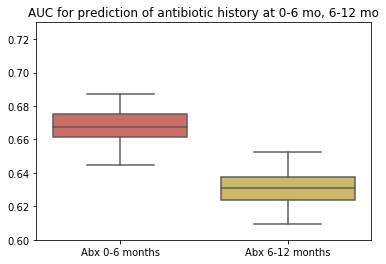

In [14]:
# ['6-mers norm', '6-mers no_scale_clr','6-mers scale_clr','7-mers norm','7-mers no_scale_clr','7-mers scale_clr']
# ['6-mers Raw', '6-mers MINVERVA','6-mers MINERVA-scale', '7-mers Raw','7-mers MINVERVA','7-mers MINVERVA-scale']
# Make boxplot for one group only

current_palette = sns.color_palette()
#sns.palplot(current_palette)
palette = sns.color_palette("hls", 8)
plot_color = palette.as_hex()


# select_columns = ['7-merclr_pca_regress_out_no_scale_first10filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first10filter_FALSE',
#        '7-mersmartsva_first10filter_FALSE',
#        '7-merclr_pca_regress_out_no_scale_first5filter_FALSE',
#        '7-merclr_pca_regress_out_scale_first5filter_FALSE',
#        '7-mersmartsva_first5filter_FALSE']

# select_labels = ["KMER MINERVA "]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma','KMERraw',
#                   'KMERbmc','KMERComBat','KMERlimma',"KMERsmartsva_first10",
#                   "KMERrefactor_first10", "KMERclr_pca_regress_out_no_scale_first10"]

# select_columns = ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'KMERraw','KMERbmc','KMERComBat','KMERlimma',
#                   "KMERsmartsva_first10","KMERrefactor_first10",
#                  "KMERno_scale_clr"] #clr_pca_regress_out_no_scale_first10

# ['OTUraw','OTUbmc','OTUComBat','OTUlimma',
#                                  'OTUclr_pca_regress_out_no_scale',"KMERnorm","KMERno_scale_clr"]

# select_labels = ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer BMC", "K-mer ComBat",
#                 "K-mer limma","K-mer smartsva","K-mer refactor","K-mer MINERVA"]
#['OTU raw','OTU BMC','OTU ComBat','OTU limma',"OTU MINERVA","K-mer raw", "K-mer MINERVA"]


# ['OTU raw','OTU BMC','OTU ComBat','OTU limma',
#                                      "K-mer raw","K-mer ComBat","K-mer smartsva*",
#                                     "K-mer MINERVA"]
if select_columns_bool:
    g=sns.boxplot( data = df_metric[select_columns],palette=plot_color)
    #plot_color[0:4] + [plot_color[7]] + [plot_color[4]] + [plot_color[7]
    if not_rotate:
        g.set_xticklabels(labels = select_labels) #df_metric.columns
    else:
        g.set_xticklabels(rotation=90,labels = select_labels) #df_metric.columns
else:
    g=sns.boxplot( data = df_metric)
    g.set_xticklabels(rotation=90,labels = df_metric.columns)
g.set(ylim=limit_spec)

g.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.pdf',bbox_inches='tight')
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans +  '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '.png',bbox_inches='tight')








In [15]:
df_metric.mean(axis=0)

AGP_max_k7_Abx0_6rawfilter_TRUE_trans_clr_scale     0.667547
AGP_max_k7_Abx6_12rawfilter_TRUE_trans_clr_scale    0.630639
dtype: float64

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AGP_max_k7_Abx0_6rawfilter_TRUE_trans_clr_scale v.s. AGP_max_k7_Abx6_12rawfilter_TRUE_trans_clr_scale: t-test paired samples with Bonferroni correction, P_val=1.696e-23 stat=1.825e+01


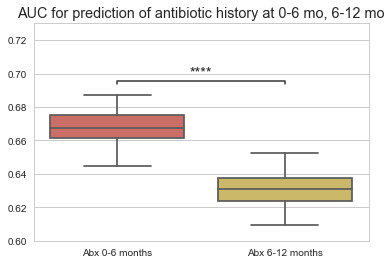

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation

sns.set(style="whitegrid")


x = "Method"
y = "AUC"
order = ['Sun', 'Thur', 'Fri', 'Sat']
ax = sns.boxplot(data=df_metric,palette=plot_color)
sns.set_context("paper", font_scale=1.5)   
if pair_test_all:
    if shortened:
        if shortened_shortened:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[2], df_metric.columns[3])],
                        test='t-test_paired', text_format='star', loc='outside', verbose=2)
        else:
            add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4])],
                        test='t-test_paired', text_format='star', loc='outside', verbose=2)

    else:
        add_stat_annotation(ax, data=df_metric,
                        box_pairs=[(df_metric.columns[0], df_metric.columns[1]),
                                  (df_metric.columns[0], df_metric.columns[2]),
                                  (df_metric.columns[0], df_metric.columns[3]),
                                  (df_metric.columns[0], df_metric.columns[4]),
                                  (df_metric.columns[0], df_metric.columns[5]),
                                  (df_metric.columns[0], df_metric.columns[6])],
                        test='t-test_paired', text_format='star', loc='outside', verbose=2)

else:
    add_stat_annotation(ax, data=df_metric,
                    box_pairs=[(df_metric.columns[0], df_metric.columns[1])],
                    test='t-test_paired', text_format='star', loc='outside', verbose=2)
# , (df_metric.columns[0], df_metric.columns[5])
if not_rotate:
    ax.set_xticklabels(labels = select_labels)
else:
    ax.set_xticklabels(rotation=90,labels = select_labels)
ax.set(ylim=limit_spec)
ax.set_title(title)
plt.savefig(plot_folder + chosen_classifier + data_type + "_" + trans + '_boxplots_' + classifier_ofc + '_' + metric_word + "_" + special_name + '_2.pdf',bbox_inches='tight')
#(df_metric.columns[0], df_metric.columns[2]),
#                              (df_metric.columns[0], df_metric.columns[3]),
#                             (df_metric.columns[0], df_metric.columns[4]),
#                             (df_metric.columns[0], df_metric.columns[5])

In [17]:
df_metric.sum(axis=1)

0     1.295475
1     1.294861
2     1.285607
3     1.268276
4     1.304316
5     1.286497
6     1.287543
7     1.299106
8     1.325211
9     1.297064
10    1.277495
11    1.304707
12    1.305944
13    1.290463
14    1.286727
15    1.269031
16    1.324929
17    1.290086
18    1.304075
19    1.290642
20    1.300419
21    1.299392
22    1.312983
23    1.290268
24    1.316114
25    1.303582
26    1.326426
27    1.292181
28    1.290425
29    1.286053
30    1.296561
31    1.275866
32    1.296928
33    1.282989
34    1.328574
35    1.298406
36    1.303931
37    1.316760
38    1.279193
39    1.304818
40    1.288949
41    1.297628
42    1.303665
43    1.320486
44    1.317487
45    1.269248
46    1.312959
47    1.314591
48    1.305445
49    1.288889
dtype: float64

In [18]:
from scipy.stats import ttest_ind


ttest_ind(df_metric[df_metric.columns[0]], df_metric[df_metric.columns[4]])


IndexError: index 4 is out of bounds for axis 0 with size 2